# Feature Selection

Modelinizin iyi bir performans göstermesi için boyutsallığının azaltılması ve güçlü ilişkilere sahip
parametrelerin, performansı kötü etkileyecek diğer parametrelerden ayrılması gerekir. Çünkü bu
öznitelikler (features) modele bir bilgi getirmiyor olabilirler.
Pekala boyut düşürmenin veya öznitelik azaltmanın yararları nedir:
- Daha yüksek doğruluk oranı
- Overfitting probleminin önüne geçmek.
- Model eğitim süresinin kısaltılması.
- Daha etkin bir görselleştirme
- Daha açıklanabilir bir model.

Veri madenciliği sürecinin önemli aşamalarından biri veri boyutunun
azaltılması işlemidir. Veri boyutunun azaltılması kısaca, büyük veri kümelerinin
depolanması ve analiz edilmesinde karşılaşılan sorunları aşmak için veri
kümesinden ilgisiz veya gereksiz değişkenlerin çıkartılması olarak
tanımlanmaktadır. Veri boyutunun azaltılması için kullanılan yöntemlerin başında
özellik seçimi gelmektedir. Özellik seçimi, orijinal veri setini temsil edebilecek en
iyi altkümenin seçimi olarak tanımlanmaktadır. Bu işlem, ilgilenilen problem için
en faydalı ve en önemli özellikleri seçerek veri kümesindeki özellik sayısını
azaltmayı yani veri boyutunu düşürmeyi amaçlamaktadır.

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

In [ ]:
os.chdir("/content/drive/MyDrive/Works/Bitirme")

In [ ]:
data_file = "Data/Veriseti_Ortaokullar_GONDERILEN.xlsx"
data_original = pd.read_excel(data_file)
df = data_original.copy()
#df = df.drop(columns=["okuladi", "okulno"])
df.head()

,okuladi,okulno,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ort5,ort6,ort7
0,OKUL1,okulno0001,1,0,0,0,0,0,0,5,4,1,0,3,3,0,1,1,5,2,2,2,2,0,0,0,85.5956,88.0247,91.0988
1,OKUL1,okulno0002,1,0,0,0,0,0,0,2,4,1,0,2,3,0,1,3,3,3,2,2,2,0,0,1,96.3081,94.9244,97.2963
2,OKUL1,okulno0003,1,0,0,0,0,0,0,4,2,1,0,3,3,0,1,2,1,0,4,3,2,1,0,1,93.4270,91.3742,89.7531
3,OKUL1,okulno0004,1,0,0,0,0,0,0,2,4,1,0,4,4,0,1,4,3,3,1,4,4,1,1,1,64.5563,64.8812,61.3426
4,OKUL1,okulno0005,1,0,0,0,0,0,0,2,2,1,0,4,2,1,1,4,4,2,1,4,1,0,1,0,91.8089,93.9298,93.3457


#Aykırı Değer Düzeltme

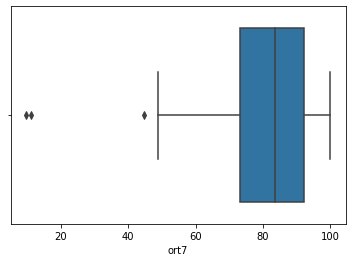

In [ ]:
sns.boxplot(x = df.ort7)

In [ ]:
df.dtypes

okuladi             object
okulno              object
cinsiyet             int64
Asag                 int64
Bsag                 int64
Aoz                  int64
Boz                  int64
ABayri               int64
Abirlikte            int64
Aogrenim             int64
Bogrenim             int64
Acalisma             int64
Bcalisma             int64
gelir                int64
kardes               int64
oda                  int64
hastalik             int64
uyku                 int64
internet             int64
televizyon           int64
eba_tv               int64
oyun                 int64
ders_calisma         int64
okul_dyk             int64
ozel_kurs            int64
sosyal_kulturel      int64
ort5               float64
ort6               float64
ort7               float64
dtype: object

In [ ]:
df.iloc[:, -3:] = df.iloc[:, -3:].astype("int64")

In [ ]:
df.dtypes

okuladi            object
okulno             object
cinsiyet            int64
Asag                int64
Bsag                int64
Aoz                 int64
Boz                 int64
ABayri              int64
Abirlikte           int64
Aogrenim            int64
Bogrenim            int64
Acalisma            int64
Bcalisma            int64
gelir               int64
kardes              int64
oda                 int64
hastalik            int64
uyku                int64
internet            int64
televizyon          int64
eba_tv              int64
oyun                int64
ders_calisma        int64
okul_dyk            int64
ozel_kurs           int64
sosyal_kulturel     int64
ort5                int64
ort6                int64
ort7                int64
dtype: object

`ort7` = 7. sınıf ortalaması tahmin edilecek.

In [ ]:
def sifir_bir_duzelt(degisken):
  for i in df[degisken].index:
    if df[degisken][i] ==0:
      df[degisken][i] = 1
    elif df[degisken][i]==1:
      df[degisken][i]=0

In [ ]:
sifir_bir_duzelt("Asag")
sifir_bir_duzelt("Bsag")
sifir_bir_duzelt("Aoz")
sifir_bir_duzelt("Boz")
sifir_bir_duzelt("ABayri")
sifir_bir_duzelt("Abirlikte")
sifir_bir_duzelt("Acalisma")
sifir_bir_duzelt("Bcalisma")
sifir_bir_duzelt("oda")
sifir_bir_duzelt("hastalik")
sifir_bir_duzelt("okul_dyk")
sifir_bir_duzelt("ozel_kurs")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
x = df #degiskenler
y = df.ort7 #tahmin edilecek

In [ ]:
x.head()

,okuladi,okulno,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ort5,ort6,ort7
0,OKUL1,okulno0001,1,1,1,1,1,1,1,5,4,0,1,3,3,1,0,1,5,2,2,2,2,1,1,0,85,88,91
1,OKUL1,okulno0002,1,1,1,1,1,1,1,2,4,0,1,2,3,1,0,3,3,3,2,2,2,1,1,1,96,94,97
2,OKUL1,okulno0003,1,1,1,1,1,1,1,4,2,0,1,3,3,1,0,2,1,0,4,3,2,0,1,1,93,91,89
3,OKUL1,okulno0004,1,1,1,1,1,1,1,2,4,0,1,4,4,1,0,4,3,3,1,4,4,0,0,1,64,64,61
4,OKUL1,okulno0005,1,1,1,1,1,1,1,2,2,0,1,4,2,0,0,4,4,2,1,4,1,1,0,0,91,93,93


In [ ]:
x.corr()

,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ort5,ort6,ort7
cinsiyet,1.000000,-1.841468e-02,0.004767,0.002617,0.028687,0.012761,0.008306,-0.013916,0.016816,-0.004198,0.021966,0.040543,-0.112941,0.006778,-0.041474,0.090402,1.213184e-01,0.027154,0.004408,0.340185,-0.159408,-0.034562,-0.040946,0.177798,-0.144784,-0.144251,-0.153145
Asag,-0.018415,1.000000e+00,-0.005039,-0.005719,-0.007402,0.081444,0.089899,-0.026049,-0.002500,0.035518,-0.000901,-0.014555,-0.050725,0.025272,0.019302,-0.001171,1.554780e-16,-0.017373,0.021938,0.060021,0.020749,-0.004240,0.038599,-0.027666,0.004644,-0.007899,0.014262
Bsag,0.004767,-5.039252e-03,1.000000,-0.006772,-0.008766,0.189352,0.073072,0.032396,0.032570,-0.079347,0.088851,0.059989,0.056272,0.009124,-0.017702,-0.024766,-1.434346e-02,0.006482,0.004617,0.014638,0.037791,-0.032471,0.020529,0.025609,0.098003,0.052234,0.109338
Aoz,0.002617,-5.718852e-03,-0.006772,1.000000,0.511757,0.049815,-0.011801,0.045626,0.051897,-0.016565,-0.027667,0.074165,-0.024432,0.043146,0.025941,-0.011892,-4.220181e-03,0.002705,0.029484,0.032922,-0.007120,0.046799,0.029648,-0.033218,0.095866,0.113257,0.097010
Boz,0.028687,-7.401994e-03,-0.008766,0.511757,1.000000,0.141669,0.041943,0.026942,0.053640,-0.021440,0.018978,0.021000,0.015144,0.043960,0.033576,-0.002037,5.462242e-03,0.037220,0.067449,0.031864,0.005887,0.039666,0.032620,-0.001956,0.057889,0.066643,0.058258
ABayri,0.012761,8.144362e-02,0.189352,0.049815,0.141669,1.000000,0.305414,-0.076008,0.054317,-0.238823,0.101794,0.073206,0.125021,0.019130,0.035807,0.005240,-6.041288e-02,0.055683,0.006996,-0.016137,0.041830,0.027372,0.026349,0.016247,0.028510,0.014191,0.021064
Abirlikte,0.008306,8.989865e-02,0.073072,-0.011801,0.041943,0.305414,1.000000,-0.004773,-0.002211,-0.053641,0.067777,0.042854,0.041741,0.076316,0.016272,0.004373,-6.479720e-03,0.018439,-0.010568,-0.001812,0.040256,0.023139,-0.008106,-0.007537,0.045287,0.063884,0.047260
Aogrenim,-0.013916,-2.604878e-02,0.032396,0.045626,0.026942,-0.076008,-0.004773,1.000000,0.471159,0.283909,0.063368,0.362621,-0.136950,0.161060,-0.005799,0.022125,6.643447e-02,-0.127693,-0.099437,-0.077455,0.188828,0.035286,0.215348,0.023854,0.306146,0.347004,0.320489
Bogrenim,0.016816,-2.500287e-03,0.032570,0.051897,0.053640,0.054317,-0.002211,0.471159,1.000000,0.086334,0.094042,0.400929,-0.098038,0.182016,-0.024474,0.022709,6.379552e-03,-0.119668,-0.005345,-0.076727,0.169126,0.011783,0.199666,0.052996,0.328829,0.355567,0.333300
Acalisma,-0.004198,3.551750e-02,-0.079347,-0.016565,-0.021440,-0.238823,-0.053641,0.283909,0.086334,1.000000,-0.022866,0.176942,-0.160518,0.047424,-0.030898,-0.045529,8.186092e-02,-0.034113,-0.029703,0.041007,-0.002316,0.001376,0.128821,0.020008,0.066236,0.074051,0.047777


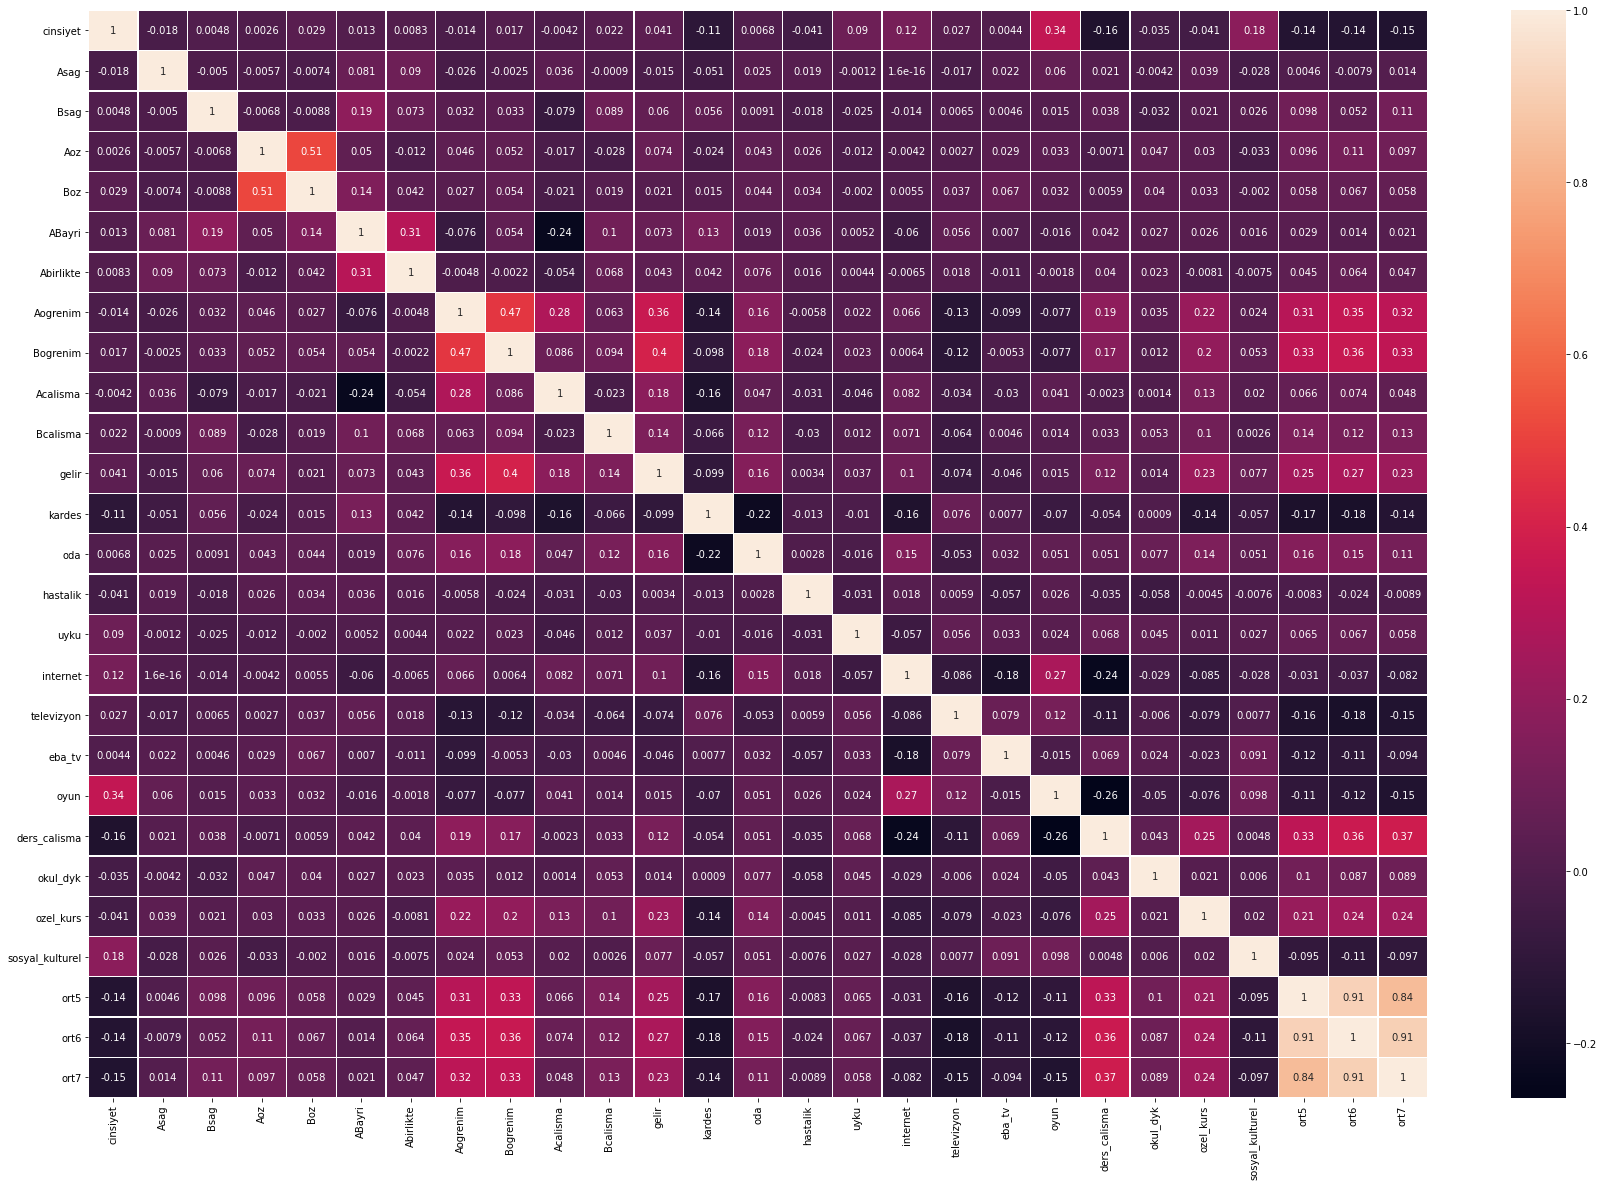

In [ ]:
fig, ax = plt.subplots(figsize=(30,20)) 
sns.heatmap(df.corr(), annot=True, linewidths=0.3, ax=ax)
plt.savefig("heatmap.png")

#Cinsiyetlere göre korelasyonları inceleyelim;

In [ ]:
df_kadin = x["cinsiyet"] == 0
x_kadin = x[df_kadin]

In [ ]:
df_erkek = x["cinsiyet"] == 1
x_erkek = x[df_erkek]

##Kadın ve erkekler ile korelasyonlar;

In [ ]:
x.corr().abs()["ort7"].nlargest(10)

ort7            1.000000
ort6            0.909238
ort5            0.843153
ders_calisma    0.374718
Bogrenim        0.333300
Aogrenim        0.320489
ozel_kurs       0.235556
gelir           0.225700
televizyon      0.154438
cinsiyet        0.153145
Name: ort7, dtype: float64

##Kadınlar için korelasyonlar;

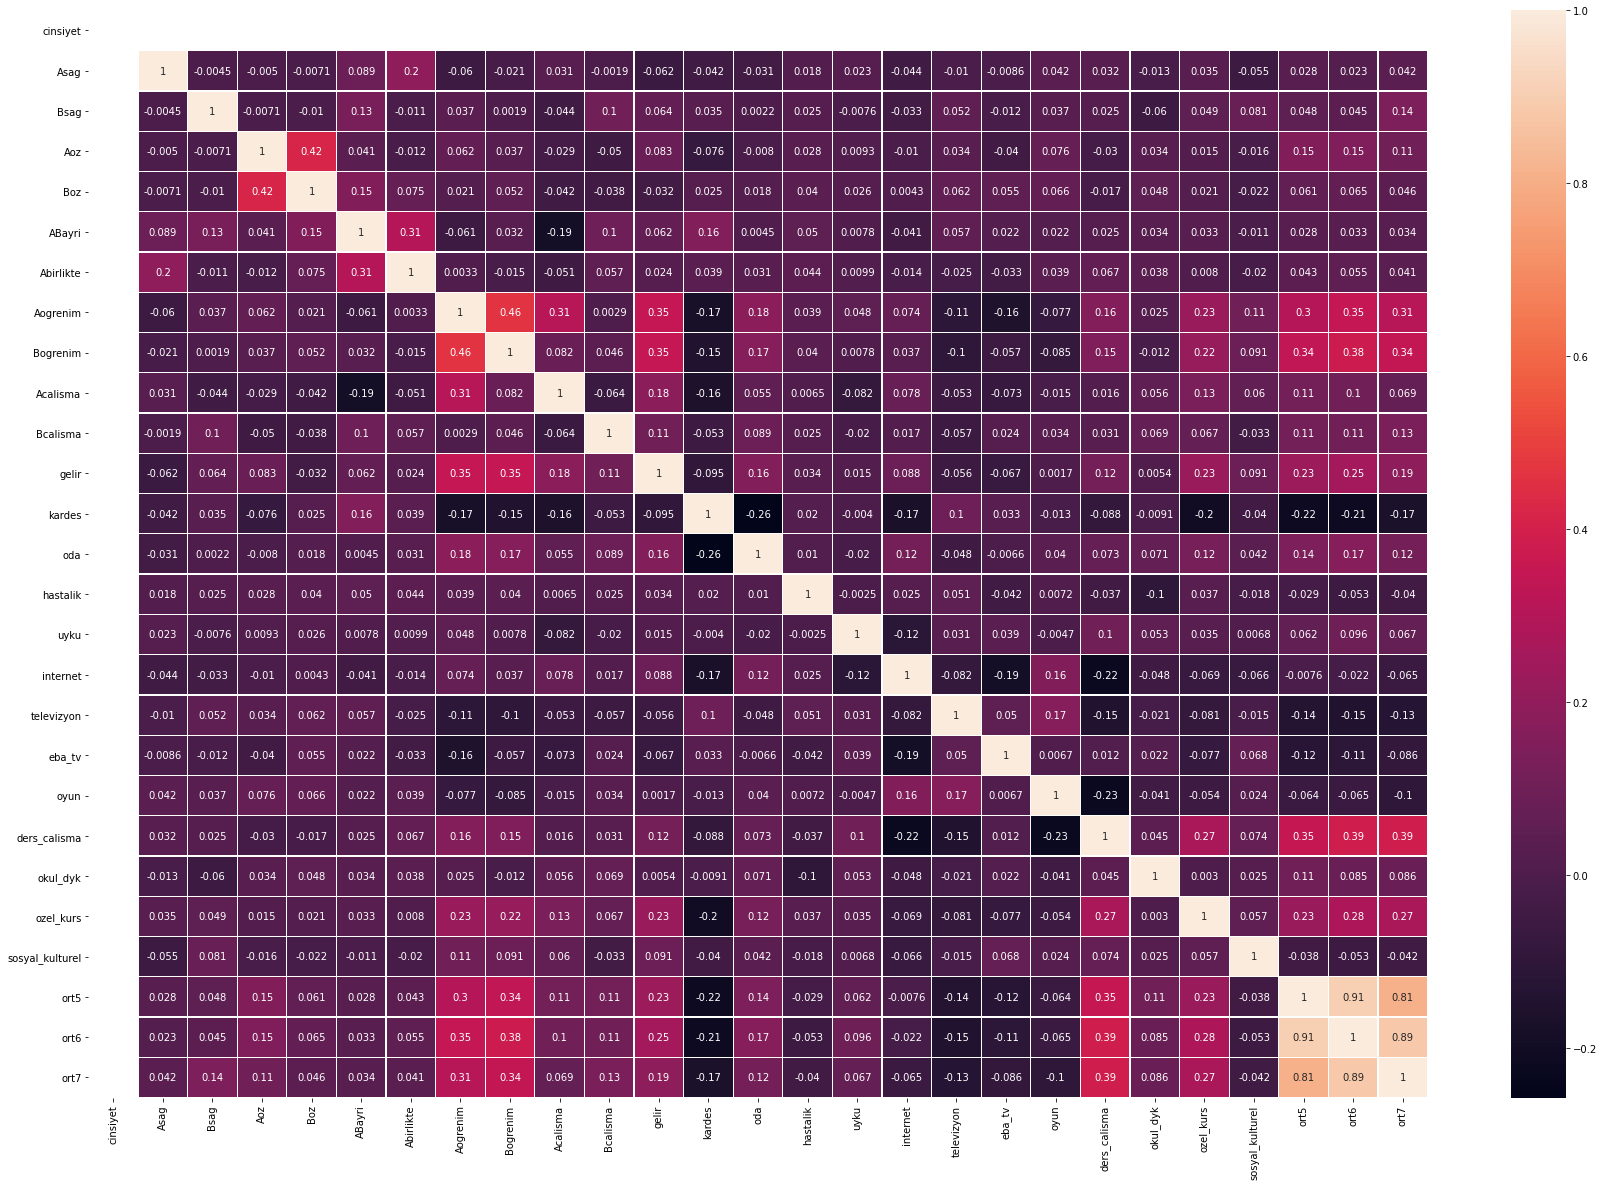

In [ ]:
fig, ax = plt.subplots(figsize=(30,20)) 
sns.heatmap(x_kadin.corr(), annot=True, linewidths=0.3, ax=ax)
plt.savefig("kadin_heatmap.png")

In [ ]:
x_kadin.corr().abs()["ort7"].nlargest(10)

ort7            1.000000
ort6            0.885503
ort5            0.812070
ders_calisma    0.390063
Bogrenim        0.344976
Aogrenim        0.309228
ozel_kurs       0.273071
gelir           0.194044
kardes          0.167018
Bsag            0.143795
Name: ort7, dtype: float64

##Erkekler için korelasyonlar;



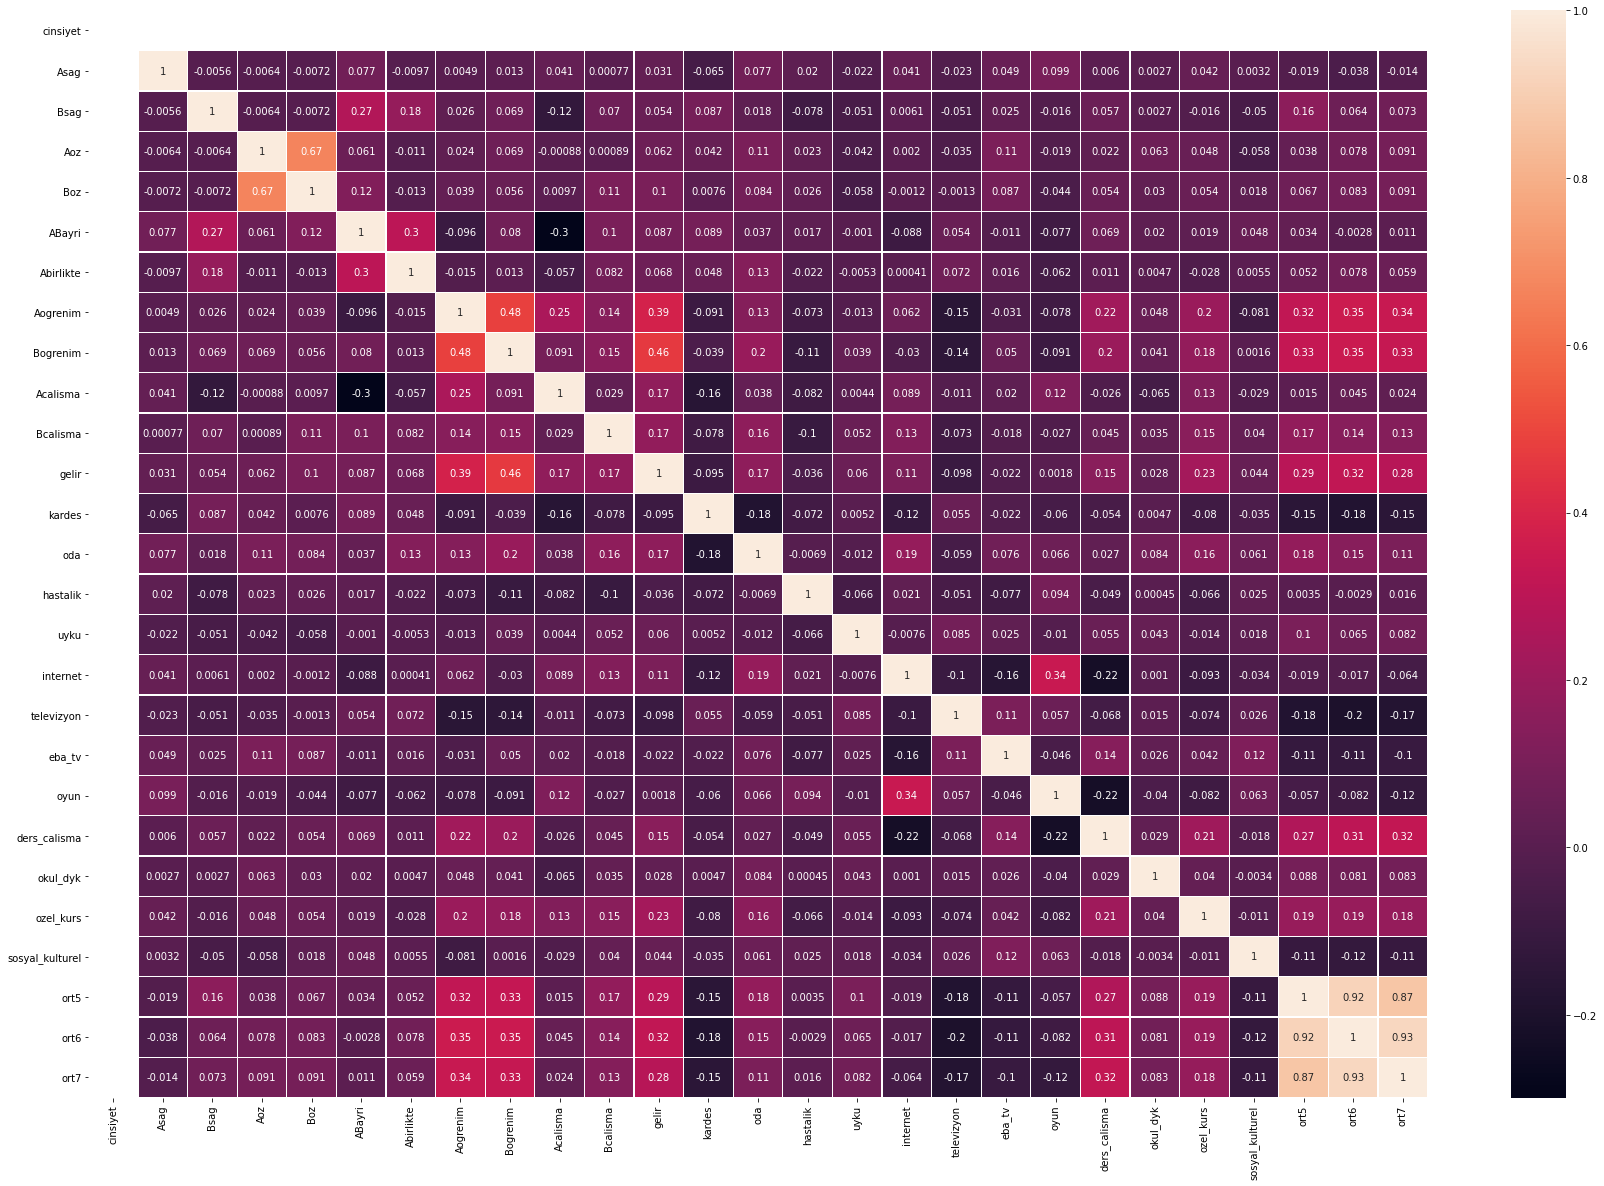

In [ ]:
fig, ax = plt.subplots(figsize=(30,20)) 
sns.heatmap(x_erkek.corr(), annot=True, linewidths=0.3, ax=ax)
plt.savefig("erkek_heatmap.png")

In [ ]:
x_erkek.corr().abs()["ort7"].nlargest(10)

ort7            1.000000
ort6            0.930199
ort5            0.868634
Aogrenim        0.339370
Bogrenim        0.334472
ders_calisma    0.323501
gelir           0.284770
ozel_kurs       0.184390
televizyon      0.173306
kardes          0.147158
Name: ort7, dtype: float64

Kolay karşılaştırmak için tekrar getirelim;

In [ ]:
x_kadin.corr().abs()["ort7"].nlargest(10)

ort7            1.000000
ort6            0.885503
ort5            0.812070
ders_calisma    0.390063
Bogrenim        0.344976
Aogrenim        0.309228
ozel_kurs       0.273071
gelir           0.194044
kardes          0.167018
Bsag            0.143795
Name: ort7, dtype: float64

In [ ]:
kadin_desc = x_kadin.describe().T

In [ ]:
erkek_desc = x_erkek.describe().T

In [ ]:
pd.concat([kadin_desc, erkek_desc], axis=1)

,count,mean,std,min,25%,50%,75%,max,count,mean,std,min,25%,50%,75%,max
cinsiyet,638.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,542.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Asag,638.0,0.996865,0.055945,0.0,1.0,1.0,1.0,1.0,542.0,0.994465,0.074260,0.0,1.0,1.0,1.0,1.0
Bsag,638.0,0.993730,0.078994,0.0,1.0,1.0,1.0,1.0,542.0,0.994465,0.074260,0.0,1.0,1.0,1.0,1.0
Aoz,638.0,0.992163,0.088248,0.0,1.0,1.0,1.0,1.0,542.0,0.992620,0.085669,0.0,1.0,1.0,1.0,1.0
Boz,638.0,0.984326,0.124308,0.0,1.0,1.0,1.0,1.0,542.0,0.990775,0.095692,0.0,1.0,1.0,1.0,1.0
ABayri,638.0,0.923197,0.266487,0.0,1.0,1.0,1.0,1.0,542.0,0.929889,0.255569,0.0,1.0,1.0,1.0,1.0
Abirlikte,638.0,0.981191,0.135956,0.0,1.0,1.0,1.0,1.0,542.0,0.983395,0.127905,0.0,1.0,1.0,1.0,1.0
Aogrenim,638.0,3.114420,1.302484,1.0,2.0,3.0,4.0,7.0,542.0,3.079336,1.201961,1.0,2.0,3.0,4.0,7.0
Bogrenim,638.0,3.529781,1.279554,1.0,2.0,4.0,4.0,7.0,542.0,3.573801,1.335252,1.0,2.0,4.0,4.0,7.0
Acalisma,638.0,0.249216,0.457580,0.0,0.0,0.0,0.0,2.0,542.0,0.245387,0.451663,0.0,0.0,0.0,0.0,2.0


Bu zamana kadar yazdığımız kısmın sonunda index metodunu ekleyerek sadece kolon isimlerini
istiyorum ve bunu ana datasetimizden başka bir değişkene aktarıyorum. Birazdan sadece bu kısmı
kullanıyor olacağız, bu sayede daha okunaklı ve en yüksek 10 korelasyon değerine sahip kolon ile
birlikte çalışıyor olacağız.

In [ ]:
x_reduced_col_names = x.corr().abs()["ort7"].nlargest(10).index
x[x_reduced_col_names].corr()

,ort7,ort6,ort5,ders_calisma,Bogrenim,Aogrenim,ozel_kurs,gelir,televizyon,cinsiyet
ort7,1.000000,0.909238,0.843153,0.374718,0.333300,0.320489,0.235556,0.225700,-0.154438,-0.153145
ort6,0.909238,1.000000,0.912723,0.364994,0.355567,0.347004,0.241577,0.272485,-0.175874,-0.144251
ort5,0.843153,0.912723,1.000000,0.327255,0.328829,0.306146,0.211915,0.248373,-0.158355,-0.144784
ders_calisma,0.374718,0.364994,0.327255,1.000000,0.169126,0.188828,0.248800,0.123214,-0.113449,-0.159408
Bogrenim,0.333300,0.355567,0.328829,0.169126,1.000000,0.471159,0.199666,0.400929,-0.119668,0.016816
Aogrenim,0.320489,0.347004,0.306146,0.188828,0.471159,1.000000,0.215348,0.362621,-0.127693,-0.013916
ozel_kurs,0.235556,0.241577,0.211915,0.248800,0.199666,0.215348,1.000000,0.225053,-0.078590,-0.040946
gelir,0.225700,0.272485,0.248373,0.123214,0.400929,0.362621,0.225053,1.000000,-0.073796,0.040543
televizyon,-0.154438,-0.175874,-0.158355,-0.113449,-0.119668,-0.127693,-0.078590,-0.073796,1.000000,0.027154
cinsiyet,-0.153145,-0.144251,-0.144784,-0.159408,0.016816,-0.013916,-0.040946,0.040543,0.027154,1.000000


In [ ]:
x = x[x_reduced_col_names]
x.dtypes

ort7            int64
ort6            int64
ort5            int64
ders_calisma    int64
Bogrenim        int64
Aogrenim        int64
ozel_kurs       int64
gelir           int64
televizyon      int64
cinsiyet        int64
dtype: object

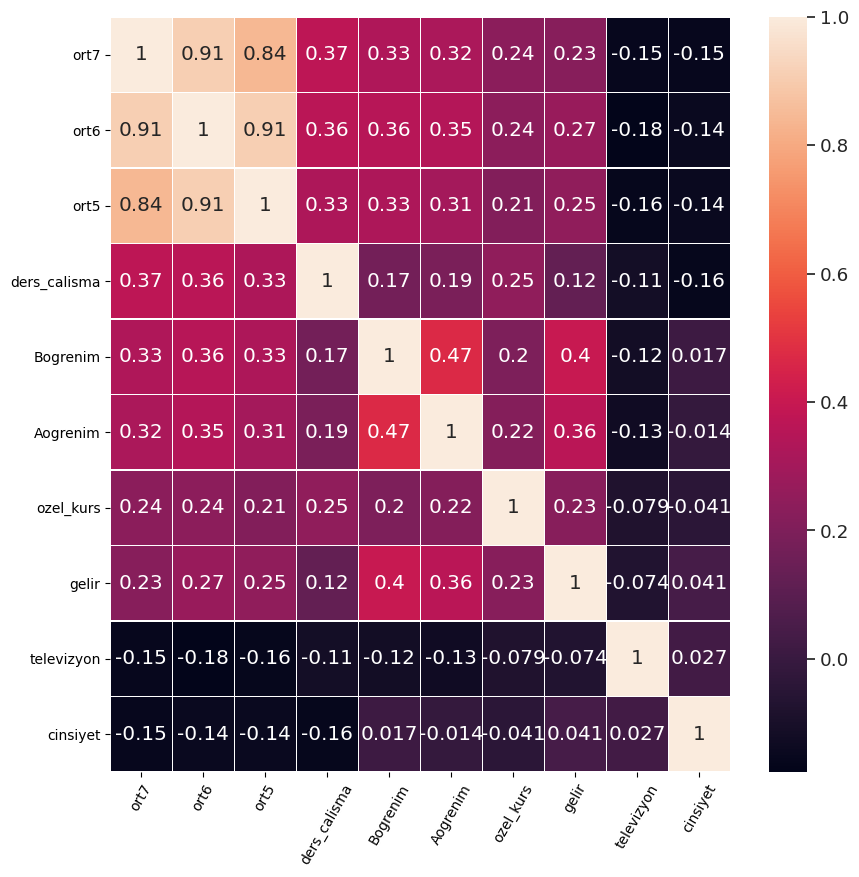

In [ ]:
fig, ax = plt.subplots(figsize=(10,10), dpi=100) 
sns.set(font_scale=1.2)
sns.heatmap(x[x_reduced_col_names].corr(), annot=True, linewidths=0.3, ax=ax)
plt.xticks(rotation=60)
plt.savefig("reduced_heatmap.png")

**Burada ozel_ders değişkeninde Evet = 0, Hayır = 1 olarak atandığı için pozitif çıkması gereken korelasyon negatif gözükmektedir.**

# Split Data

In [ ]:
x = x.drop("ort7", axis=1)
y = df.ort7

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=42)

# Specify and Fit the Model

#Decision Tree Regressor

`DecisionTreeRegressor` modeli oluşturalım ve ilgili veriler ile eğitelim.

In [ ]:
model = DecisionTreeRegressor(max_depth=3)

model.fit(train_x, train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

#  Make Predictions with Validation Data

In [ ]:
val_predictions = model.predict(val_x)

print("Eğitim doğruluğu: ", model.score(train_x, train_y)*100)
print("Test doğruluğu: ", model.score(val_x, val_y)*100)

Eğitim doğruluğu:  81.76926540241847
Test doğruluğu:  81.58106676777753


In [ ]:
print(val_predictions[:5], "\n")

print(val_y.head())

[91.50393701 70.80434783 64.75324675 64.75324675 96.05714286] 

210    88
58     77
943    67
584    63
218    99
Name: ort7, dtype: int64


In [ ]:
val_predictions[-10:]

array([91.50393701, 96.05714286, 77.42608696, 77.42608696, 82.44852941,
       82.44852941, 87.08181818, 70.80434783, 87.08181818, 91.50393701])

In [ ]:
val_y[-10:]

864    89
786    98
289    76
485    75
724    81
227    80
344    79
543    76
941    86
361    92
Name: ort7, dtype: int64

#Calculate the Mean Absolute Error in Validation Data 

In [ ]:
val_mae = mean_absolute_error(val_y, val_predictions)

print(val_mae)

3.5429863504406236


In [ ]:
pred = val_predictions[-10:].astype("int64")
org = val_y[-10:].values
df_pred = pd.DataFrame({"preds" : pred, "labels":org})
df_pred

,preds,labels
0,91,89
1,96,98
2,77,76
3,77,75
4,82,81
5,82,80
6,87,79
7,70,76
8,87,86
9,91,92


#XGBoost

Structured veriler için en doğru sonuçları veren modelleme tekniği.

In [ ]:
XGB_model = XGBRegressor()

In [ ]:
XGB_model.fit(train_x, train_y)

[22:17:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
predictions = XGB_model.predict(val_x)
print('Eğitim doğruluğu :',XGB_model.score(train_x,train_y)*100)
print('Test doğruluğu :',XGB_model.score(val_x,val_y)*100)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, val_y)))

Eğitim doğruluğu : 87.8912565372417
Test doğruluğu : 80.99351876800353
Mean Absolute Error: 3.5432505720752783


## Parameter Tuning

XGBoost, doğruluğu ve eğitim hızını önemli ölçüde etkileyebilecek birkaç parametreye sahiptir.

In [ ]:
XGB_model = XGBRegressor(n_estimators=500, 
                         learning_rate=0.25, 
                         max_depth=3,
                         min_child_weight=5, 
                         colsample_bytree=0.4
                         )
XGB_model.fit(train_x, train_y,
              early_stopping_rounds = 5,
              eval_set=[(val_x, val_y)],
              
              verbose=False)

predictions = XGB_model.predict(val_x)

print('Eğitim doğruluğu :',XGB_model.score(train_x,train_y)*100)
print('Test doğruluğu :',XGB_model.score(val_x,val_y)*100)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, val_y)))

[22:17:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Eğitim doğruluğu : 84.64730985577323
Test doğruluğu : 80.58396783878382
Mean Absolute Error: 3.639353516142247


In [ ]:
val_predictions = XGB_model.predict(val_x)

print(val_predictions[:5], "\n")

print(val_y.head())

[92.03397  71.215225 66.36045  62.335022 96.43078 ] 

210    88
58     77
943    67
584    63
218    99
Name: ort7, dtype: int64


In [ ]:
pred = val_predictions[-10:].astype("int64")
org = val_y[-10:].values
df_pred = pd.DataFrame({"preds" : pred, "labels":org})
df_pred

,preds,labels
0,92,89
1,96,98
2,79,76
3,77,75
4,83,81
5,82,80
6,85,79
7,75,76
8,89,86
9,91,92




---

# Classification

In [ ]:
data_file = "Data/Veriseti_Ortaokullar_GONDERILEN.xlsx"
data_original = pd.read_excel(data_file)
df = data_original.copy()
df = df.drop(columns=["okuladi", "okulno"])
df.head()

,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ort5,ort6,ort7
0,1,0,0,0,0,0,0,5,4,1,0,3,3,0,1,1,5,2,2,2,2,0,0,0,85.5956,88.0247,91.0988
1,1,0,0,0,0,0,0,2,4,1,0,2,3,0,1,3,3,3,2,2,2,0,0,1,96.3081,94.9244,97.2963
2,1,0,0,0,0,0,0,4,2,1,0,3,3,0,1,2,1,0,4,3,2,1,0,1,93.4270,91.3742,89.7531
3,1,0,0,0,0,0,0,2,4,1,0,4,4,0,1,4,3,3,1,4,4,1,1,1,64.5563,64.8812,61.3426
4,1,0,0,0,0,0,0,2,2,1,0,4,2,1,1,4,4,2,1,4,1,0,1,0,91.8089,93.9298,93.3457


In [ ]:
df.iloc[:, -3:] = df.iloc[:, -3:].astype("int64")

In [ ]:
df

,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ort5,ort6,ort7
0,1,0,0,0,0,0,0,5,4,1,0,3,3,0,1,1,5,2,2,2,2,0,0,0,85,88,91
1,1,0,0,0,0,0,0,2,4,1,0,2,3,0,1,3,3,3,2,2,2,0,0,1,96,94,97
2,1,0,0,0,0,0,0,4,2,1,0,3,3,0,1,2,1,0,4,3,2,1,0,1,93,91,89
3,1,0,0,0,0,0,0,2,4,1,0,4,4,0,1,4,3,3,1,4,4,1,1,1,64,64,61
4,1,0,0,0,0,0,0,2,2,1,0,4,2,1,1,4,4,2,1,4,1,0,1,0,91,93,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,0,0,0,0,0,0,0,2,4,1,0,3,3,1,1,3,1,2,4,1,3,0,1,1,97,95,95
1176,1,0,0,0,0,0,0,4,3,1,0,3,3,1,1,4,2,3,3,2,4,0,1,1,89,85,87
1177,0,0,0,0,0,0,0,2,3,1,0,3,3,0,1,3,3,1,1,1,3,1,1,1,98,98,95
1178,1,0,0,0,0,0,0,4,3,1,0,2,4,0,1,3,1,1,3,1,3,0,1,0,94,92,95


In [ ]:
def sifir_bir_duzelt(degisken):
  for i in df[degisken].index:
    if df[degisken][i] ==0:
      df[degisken][i] = 1
    elif df[degisken][i]==1:
      df[degisken][i]=0

In [ ]:
sifir_bir_duzelt("Asag")
sifir_bir_duzelt("Bsag")
sifir_bir_duzelt("Aoz")
sifir_bir_duzelt("Boz")
sifir_bir_duzelt("ABayri")
sifir_bir_duzelt("Abirlikte")
sifir_bir_duzelt("Acalisma")
sifir_bir_duzelt("Bcalisma")
sifir_bir_duzelt("oda")
sifir_bir_duzelt("hastalik")
sifir_bir_duzelt("okul_dyk")
sifir_bir_duzelt("ozel_kurs")

In [ ]:
def puan_olcegi(ort):
  for i in df[ort].index:
    if df[ort][i] >=0 and df[ort][i] <= 24:
      df[ort][i] = 0
    elif df[ort][i] >=25 and df[ort][i] <= 44:
      df[ort][i] = 1
    elif df[ort][i] >= 45 and df[ort][i] <=54:
      df[ort][i] = 2
    elif df[ort][i] >= 55 and df[ort][i] <=69:
      df[ort][i] = 3
    elif df[ort][i] >= 70 and df[ort][i] <=84:
      df[ort][i] = 4
    elif df[ort][i] >= 85 and df[ort][i] <=100:
      df[ort][i] = 5

In [ ]:
puan_olcegi(ort = "ort5")
puan_olcegi(ort = "ort6")
puan_olcegi(ort = "ort7")

In [ ]:
df

,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ort5,ort6,ort7
0,1,1,1,1,1,1,1,5,4,0,1,3,3,1,0,1,5,2,2,2,2,1,1,0,5,5,5
1,1,1,1,1,1,1,1,2,4,0,1,2,3,1,0,3,3,3,2,2,2,1,1,1,5,5,5
2,1,1,1,1,1,1,1,4,2,0,1,3,3,1,0,2,1,0,4,3,2,0,1,1,5,5,5
3,1,1,1,1,1,1,1,2,4,0,1,4,4,1,0,4,3,3,1,4,4,0,0,1,3,3,3
4,1,1,1,1,1,1,1,2,2,0,1,4,2,0,0,4,4,2,1,4,1,1,0,0,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,0,1,1,1,1,1,1,2,4,0,1,3,3,0,0,3,1,2,4,1,3,1,0,1,5,5,5
1176,1,1,1,1,1,1,1,4,3,0,1,3,3,0,0,4,2,3,3,2,4,1,0,1,5,5,5
1177,0,1,1,1,1,1,1,2,3,0,1,3,3,1,0,3,3,1,1,1,3,0,0,1,5,5,5
1178,1,1,1,1,1,1,1,4,3,0,1,2,4,1,0,3,1,1,3,1,3,1,0,0,5,5,5


## Feature Selection

In [ ]:
x_cl = df #degiskenler
y_cl = df.ort7 #tahmin edilecek

In [ ]:
x_cl.head()

,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ort5,ort6,ort7
0,1,1,1,1,1,1,1,5,4,0,1,3,3,1,0,1,5,2,2,2,2,1,1,0,5,5,5
1,1,1,1,1,1,1,1,2,4,0,1,2,3,1,0,3,3,3,2,2,2,1,1,1,5,5,5
2,1,1,1,1,1,1,1,4,2,0,1,3,3,1,0,2,1,0,4,3,2,0,1,1,5,5,5
3,1,1,1,1,1,1,1,2,4,0,1,4,4,1,0,4,3,3,1,4,4,0,0,1,3,3,3
4,1,1,1,1,1,1,1,2,2,0,1,4,2,0,0,4,4,2,1,4,1,1,0,0,5,5,5


In [ ]:
x_cl.corr()

,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ort5,ort6,ort7
cinsiyet,1.000000,-1.841468e-02,0.004767,0.002617,0.028687,0.012761,0.008306,-0.013916,0.016816,-0.004198,0.021966,0.040543,-0.112941,0.006778,-0.041474,0.090402,1.213184e-01,0.027154,0.004408,0.340185,-0.159408,-0.034562,-0.040946,0.177798,-0.142782,-0.153536,-0.148667
Asag,-0.018415,1.000000e+00,-0.005039,-0.005719,-0.007402,0.081444,0.089899,-0.026049,-0.002500,0.035518,-0.000901,-0.014555,-0.050725,0.025272,0.019302,-0.001171,1.554780e-16,-0.017373,0.021938,0.060021,0.020749,-0.004240,0.038599,-0.027666,0.000146,-0.010293,0.005045
Bsag,0.004767,-5.039252e-03,1.000000,-0.006772,-0.008766,0.189352,0.073072,0.032396,0.032570,-0.079347,0.088851,0.059989,0.056272,0.009124,-0.017702,-0.024766,-1.434346e-02,0.006482,0.004617,0.014638,0.037791,-0.032471,0.020529,0.025609,0.113598,0.054906,0.118768
Aoz,0.002617,-5.718852e-03,-0.006772,1.000000,0.511757,0.049815,-0.011801,0.045626,0.051897,-0.016565,-0.027667,0.074165,-0.024432,0.043146,0.025941,-0.011892,-4.220181e-03,0.002705,0.029484,0.032922,-0.007120,0.046799,0.029648,-0.033218,0.084911,0.104614,0.099228
Boz,0.028687,-7.401994e-03,-0.008766,0.511757,1.000000,0.141669,0.041943,0.026942,0.053640,-0.021440,0.018978,0.021000,0.015144,0.043960,0.033576,-0.002037,5.462242e-03,0.037220,0.067449,0.031864,0.005887,0.039666,0.032620,-0.001956,0.070029,0.068331,0.064002
ABayri,0.012761,8.144362e-02,0.189352,0.049815,0.141669,1.000000,0.305414,-0.076008,0.054317,-0.238823,0.101794,0.073206,0.125021,0.019130,0.035807,0.005240,-6.041288e-02,0.055683,0.006996,-0.016137,0.041830,0.027372,0.026349,0.016247,0.038234,0.016274,0.011560
Abirlikte,0.008306,8.989865e-02,0.073072,-0.011801,0.041943,0.305414,1.000000,-0.004773,-0.002211,-0.053641,0.067777,0.042854,0.041741,0.076316,0.016272,0.004373,-6.479720e-03,0.018439,-0.010568,-0.001812,0.040256,0.023139,-0.008106,-0.007537,0.062803,0.063197,0.050966
Aogrenim,-0.013916,-2.604878e-02,0.032396,0.045626,0.026942,-0.076008,-0.004773,1.000000,0.471159,0.283909,0.063368,0.362621,-0.136950,0.161060,-0.005799,0.022125,6.643447e-02,-0.127693,-0.099437,-0.077455,0.188828,0.035286,0.215348,0.023854,0.247451,0.312748,0.293353
Bogrenim,0.016816,-2.500287e-03,0.032570,0.051897,0.053640,0.054317,-0.002211,0.471159,1.000000,0.086334,0.094042,0.400929,-0.098038,0.182016,-0.024474,0.022709,6.379552e-03,-0.119668,-0.005345,-0.076727,0.169126,0.011783,0.199666,0.052996,0.276753,0.315361,0.297170
Acalisma,-0.004198,3.551750e-02,-0.079347,-0.016565,-0.021440,-0.238823,-0.053641,0.283909,0.086334,1.000000,-0.022866,0.176942,-0.160518,0.047424,-0.030898,-0.045529,8.186092e-02,-0.034113,-0.029703,0.041007,-0.002316,0.001376,0.128821,0.020008,0.041045,0.069854,0.029587


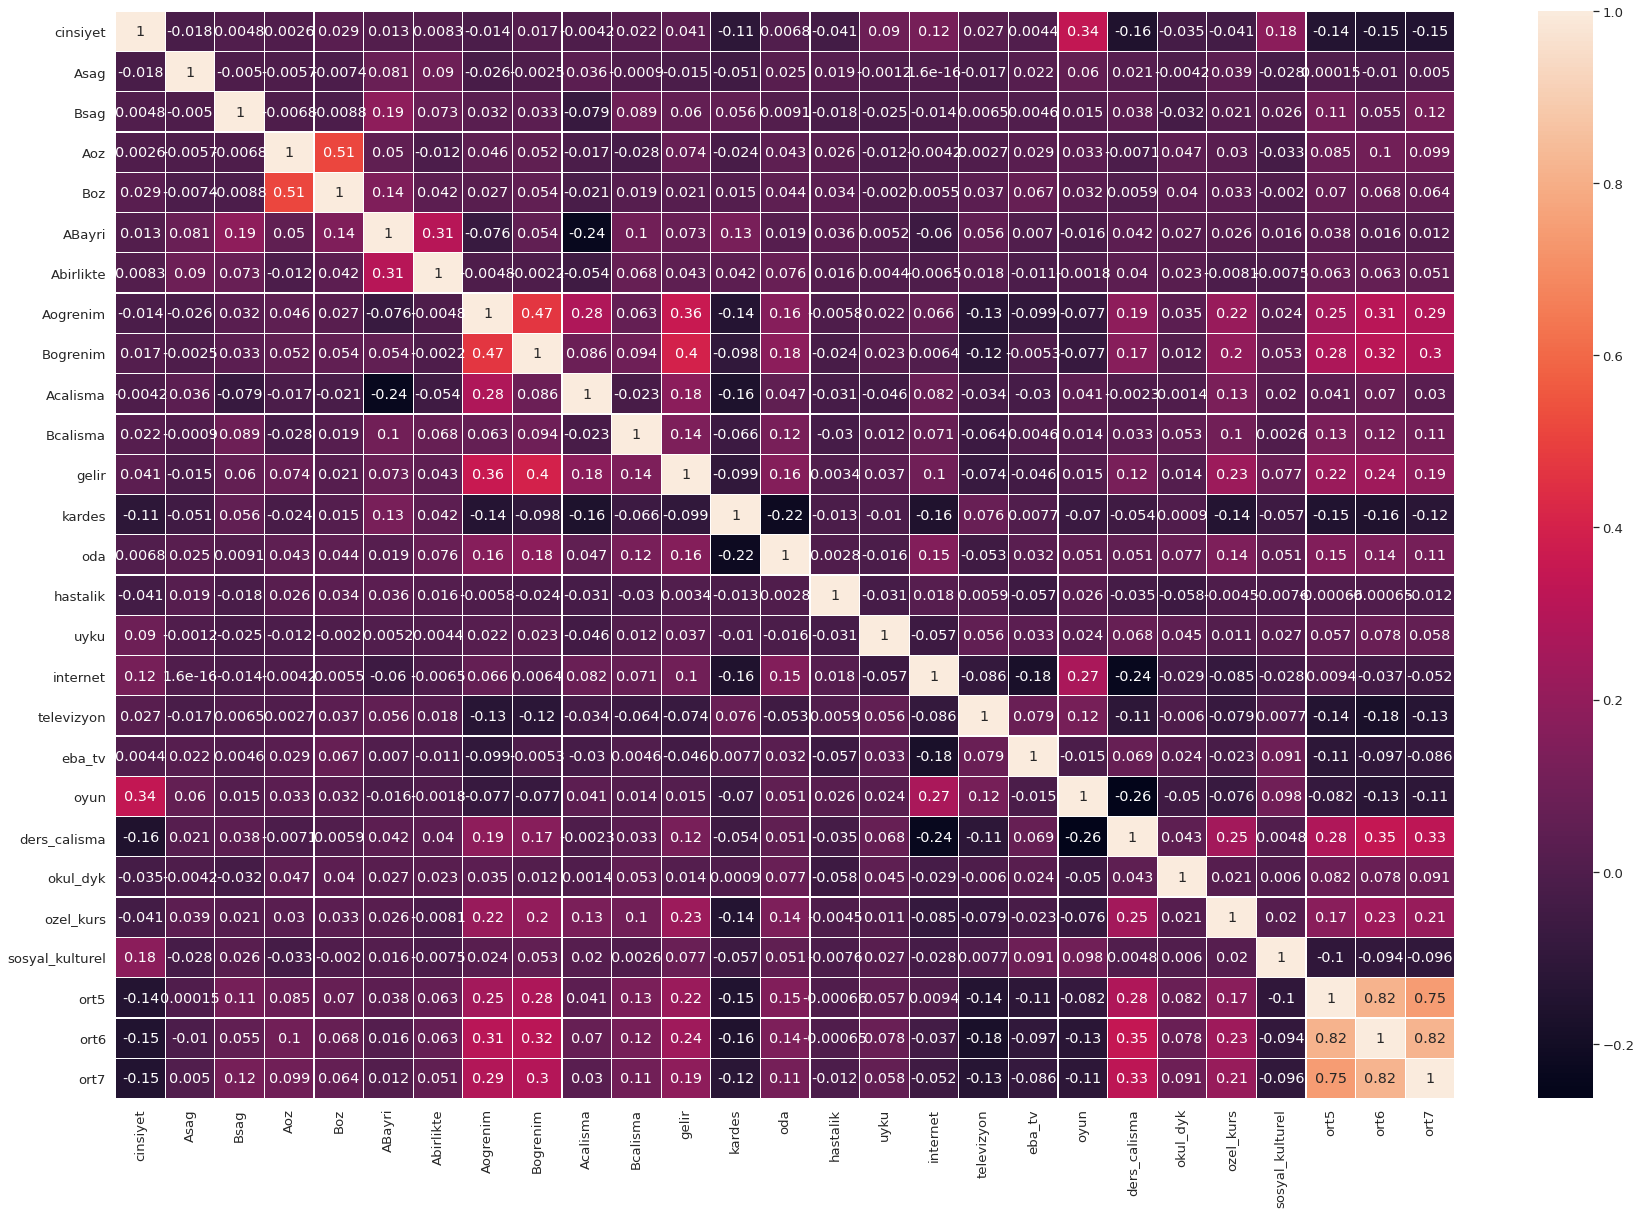

In [ ]:
fig, ax = plt.subplots(figsize=(30,20)) 
sns.heatmap(df.corr(), annot=True, linewidths=0.3, ax=ax)
plt.savefig("heatmap_classification.png")

In [ ]:
x_cl.corr().abs()["ort7"].nlargest(10)

ort7            1.000000
ort6            0.819369
ort5            0.746047
ders_calisma    0.326606
Bogrenim        0.297170
Aogrenim        0.293353
ozel_kurs       0.210225
gelir           0.187907
cinsiyet        0.148667
televizyon      0.134761
Name: ort7, dtype: float64

In [ ]:
x_cl_reduced_col_names = x_cl.corr().abs()["ort7"].nlargest(10).index
x_cl[x_cl_reduced_col_names].corr()

,ort7,ort6,ort5,ders_calisma,Bogrenim,Aogrenim,ozel_kurs,gelir,cinsiyet,televizyon
ort7,1.000000,0.819369,0.746047,0.326606,0.297170,0.293353,0.210225,0.187907,-0.148667,-0.134761
ort6,0.819369,1.000000,0.816771,0.345503,0.315361,0.312748,0.231996,0.236522,-0.153536,-0.175040
ort5,0.746047,0.816771,1.000000,0.281535,0.276753,0.247451,0.173471,0.220667,-0.142782,-0.143260
ders_calisma,0.326606,0.345503,0.281535,1.000000,0.169126,0.188828,0.248800,0.123214,-0.159408,-0.113449
Bogrenim,0.297170,0.315361,0.276753,0.169126,1.000000,0.471159,0.199666,0.400929,0.016816,-0.119668
Aogrenim,0.293353,0.312748,0.247451,0.188828,0.471159,1.000000,0.215348,0.362621,-0.013916,-0.127693
ozel_kurs,0.210225,0.231996,0.173471,0.248800,0.199666,0.215348,1.000000,0.225053,-0.040946,-0.078590
gelir,0.187907,0.236522,0.220667,0.123214,0.400929,0.362621,0.225053,1.000000,0.040543,-0.073796
cinsiyet,-0.148667,-0.153536,-0.142782,-0.159408,0.016816,-0.013916,-0.040946,0.040543,1.000000,0.027154
televizyon,-0.134761,-0.175040,-0.143260,-0.113449,-0.119668,-0.127693,-0.078590,-0.073796,0.027154,1.000000


In [ ]:
x_cl = x_cl[x_cl_reduced_col_names]
x_cl.dtypes

ort7            int64
ort6            int64
ort5            int64
ders_calisma    int64
Bogrenim        int64
Aogrenim        int64
ozel_kurs       int64
gelir           int64
cinsiyet        int64
televizyon      int64
dtype: object

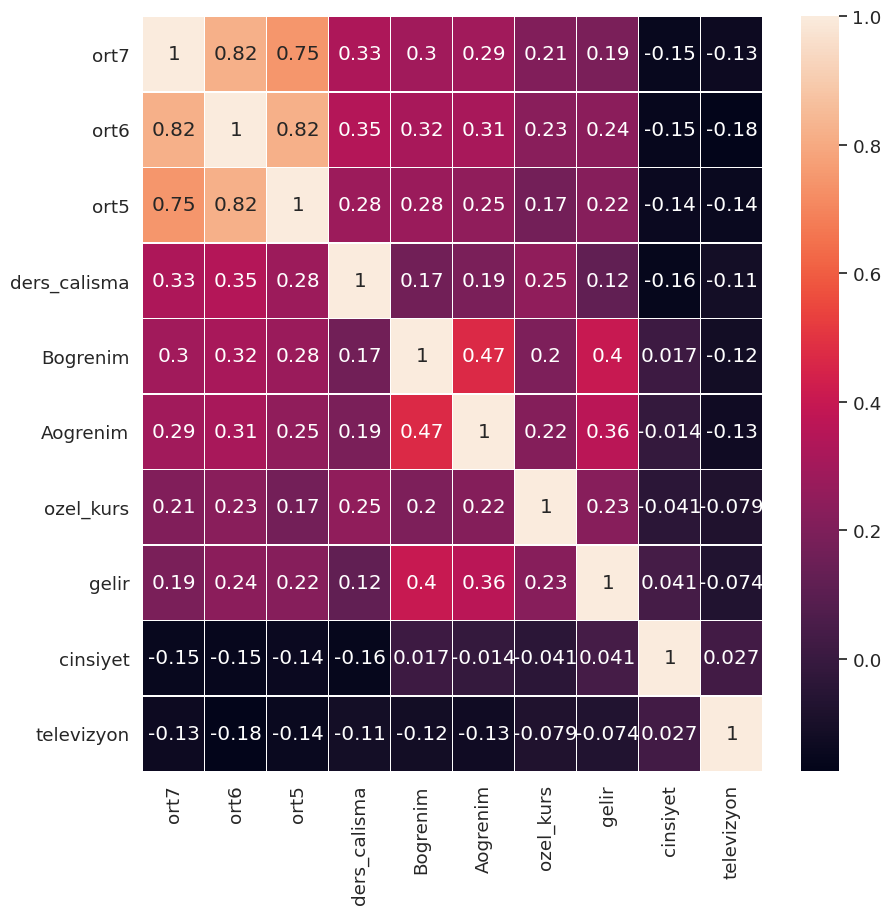

In [ ]:
fig, ax = plt.subplots(figsize=(10,10), dpi=100) 
sns.heatmap(x_cl[x_cl_reduced_col_names].corr(), annot=True, linewidths=0.3, ax=ax)
plt.savefig("reduced_cl_heatmap.png")

## Split Data

In [ ]:
x_cl = x_cl.drop("ort7", axis=1)
y_cl = df.ort7

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(x_cl, y_cl, random_state=42)

##Specify and Fit the Model

### Multinomial Logistic Regression

Üç veya daha fazla kategoriye sahip verileri sınıflandırmak için kullanılan bir Logistic Regression yöntemidir.

In [ ]:
ort_logistic = LogisticRegression()

ort_logistic.fit(train_x, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
base_model_predicts = ort_logistic.predict(val_x)
print('Accuracy from base model train data : {0}'.format(ort_logistic.score(train_x, train_y)))
print('Accuracy from base model test data: {0}'.format(ort_logistic.score(val_x, val_y)))

Accuracy from base model train data : 0.7694915254237288
Accuracy from base model test data: 0.8101694915254237


In [ ]:
custom_ort_logistic = LogisticRegression( penalty = "l2", C=100)

custom_ort_logistic.fit(train_x,train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
custom_model_predicts = custom_ort_logistic.predict(val_x)
print('Accuracy from base model train data : {0}'.format(custom_ort_logistic.score(train_x, train_y)))
print('Accuracy from base model test data: {0}'.format(custom_ort_logistic.score(val_x, val_y)))

Accuracy from base model train data : 0.7706214689265537
Accuracy from base model test data: 0.8033898305084746


In [ ]:
base_model_accuracy = ort_logistic.score(val_x,val_y)*100
custom_model_accuracy = custom_ort_logistic.score(val_x,val_y)*100

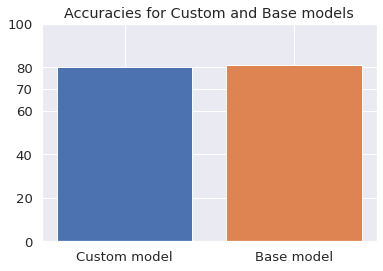

In [ ]:
plt.bar("Custom model",custom_model_accuracy)
plt.bar("Base model",base_model_accuracy)
plt.yticks([0,20,40,60,70,80,100])
plt.title('Accuracies for Custom and Base models')
plt.show()

Modelimizi varsayılan lineer regresyon algoritmasıyla ve varsayılan ve özel parametrelerle eğittik. Test verileri için hangisinin daha iyi sonuç verdiğini gördük. Bu sefer özelleştirilmiş parametre daha iyi sonuç verdi, ama bilirlik oranı eğitim verileri ve test verilerine göre değişiklik gösterebilir.

###K-Nearest Neighbor Algorithm (KNN)

Bu algoritma veri setimize göre yapılan tahmine en yakın K sayısı kadar (özel olarak seçilmiş bir sayı) komşu bulur. Komşuların hangi sınıflara dahil olduğunu dikkate alarak bir karar verir ve bir cevap bulur.

Komşuları bulmak için Öklid Uzaklığı kullanılabilir.

In [ ]:
ort_knn = KNeighborsClassifier(n_neighbors = 10) #K komşu sayısı

ort_knn.fit(train_x,train_y) #Modelimizi eğitim verilerine göre eğittik.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

KNN algoritmasında komşu sayısı modelimizin bilirlik oranı için önemlidir. Eğer komşu sayısı yeterli değilse modelimizin fazla güvenilir olmaz. Eğer komşu sayısı çok fazlaysa, model overfitting yaşar ve benzer şekilde, bu da modelin güvenilirliğini azaltır. Ayrıca overfitting zaman komplikasyonlarına yol açar, yani modelin tepki verme süresini uzatır. Daha iyi bir bilirlik oranı elde etmek için komşu sayısı değiştirilebilir.

In [ ]:
knn_test_values = ort_knn.predict(val_x) #Tahmin edilen KNN değerleri için değişkenlerden yararlanıyoruz.
#Bu değerleri test verilerimizin etiketleriyle, yani gerçek sonuçlarla, karşılaştıracağız
#ve başarı oranımızı göreceğiz.
true_predicts = 0
import numpy
valy = numpy.array(val_y)
for i in range(len(val_y)):
    if(valy[i] == knn_test_values[i]):
        true_predicts += 1


print("Test Variables Size : ",len(valy))
#Şimdi, başarı oranını yüzde cinsinden hesaplayalım.
#Toplam test verisi sayısı 30

knn_accuracy = 100*true_predicts/len(valy)
print("KNN Accuracy for ort dataset : %",knn_accuracy)

Test Variables Size :  295
KNN Accuracy for ort dataset : % 74.23728813559322


Şimdi elimizde hem lojistik regresyonun hem de KNN’nin bilirlik oranı var. Üçünü de yan yana görmek için bir tane daha grafik oluşturalım.

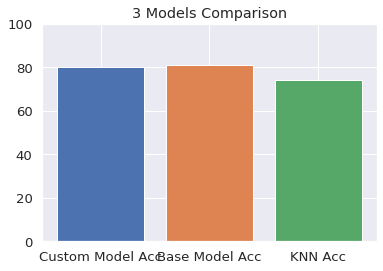

In [ ]:
plt.bar("Custom Model Acc",custom_model_accuracy)
plt.bar("Base Model Acc",base_model_accuracy)
plt.bar("KNN Acc",knn_accuracy)
plt.yticks([0,20,40,60,80,100]) #y ekseninde görmek istediğimiz rakamlar
plt.title("3 Models Comparison")

plt.show()

### Support Vector Machine (SVM)

SVM sınıfları (özellikleri) bir hiper düzlemle bölen makine öğrenmesi algoritmasıdır.

In [ ]:
ort_svm = svm.SVC(kernel = "poly").fit(train_x,train_y)

In [ ]:
svm_predict = ort_svm.predict(val_x)

svm_accuracy = accuracy_score(valy,svm_predict)
svm_accuracy = svm_accuracy*100
print("SVM Accuracy for ort dataset : %",svm_accuracy)

SVM Accuracy for ort dataset : % 81.35593220338984


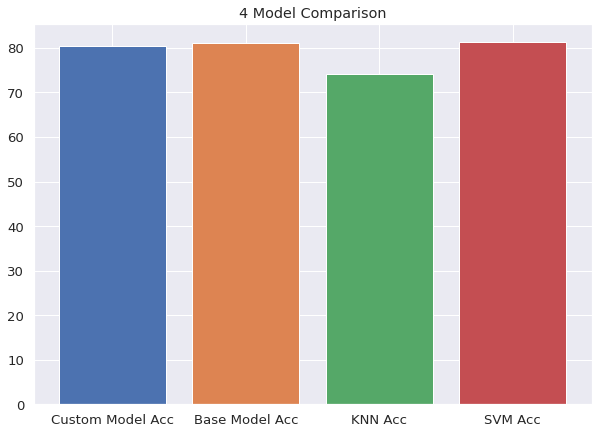

In [ ]:
plt.figure(figsize =(10,7))
plt.bar('Custom Model Acc',custom_model_accuracy)
plt.bar('Base Model Acc',base_model_accuracy)
plt.bar('KNN Acc',knn_accuracy)
plt.bar('SVM Acc',svm_accuracy)
plt.title("4 Model Comparison")


plt.show()

#Confusion Matrix

Confusion matrix, without normalization
[[  0   0   1   0   0]
 [  0   2   4   0   0]
 [  0   0  36  10   0]
 [  0   1  10  78  16]
 [  0   0   0  13 124]]


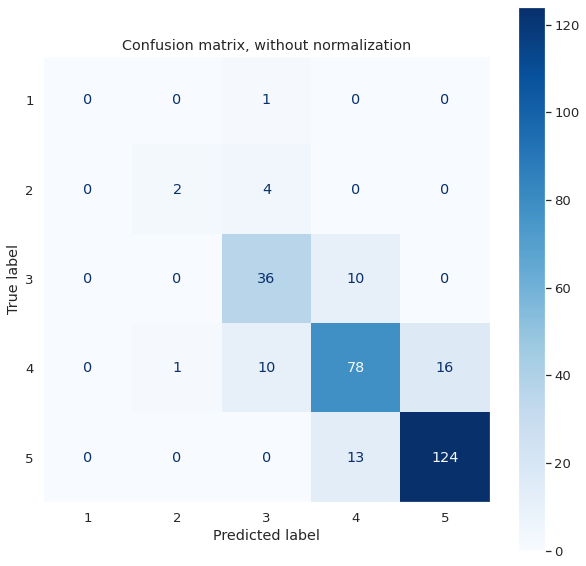

Normalized confusion matrix
[[0.   0.   1.   0.   0.  ]
 [0.   0.33 0.67 0.   0.  ]
 [0.   0.   0.78 0.22 0.  ]
 [0.   0.01 0.1  0.74 0.15]
 [0.   0.   0.   0.09 0.91]]


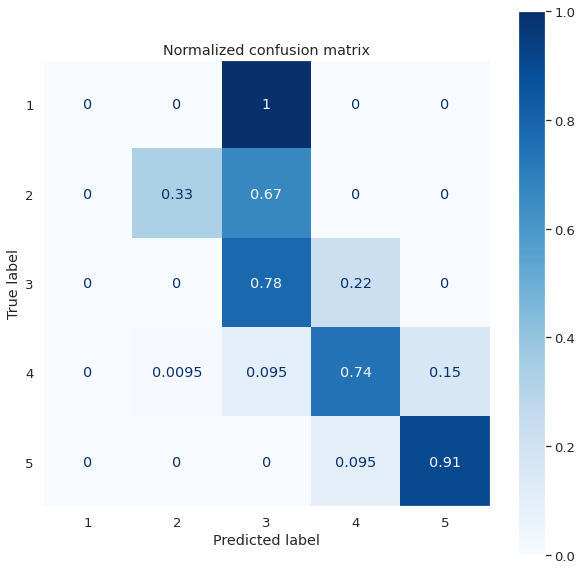

In [ ]:

title1 = "Confusion matrix, without normalization"
title2 = "Normalized confusion matrix"

class_names = ["1", "2", "3", "4", "5"]

np.set_printoptions(precision=2)

fig, ax = plt.subplots(figsize=(10, 10))
#Confusion matrix, without normalization
disp = plot_confusion_matrix(ort_svm, val_x, val_y,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None,
                                 values_format = "d",
                                  ax=ax)
disp.ax_.set_title(title1)

plt.grid(False)
    
print(title1)
print(disp.confusion_matrix)


plt.show()

fig, ax2 = plt.subplots(figsize=(10, 10))
#Normalized confusion matrix
disp = plot_confusion_matrix(ort_svm, val_x, val_y,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize="true",
                                 values_format = ".2g",
                                  ax=ax2)
disp.ax_.set_title(title2)

plt.grid(False)
    
print(title2)
print(disp.confusion_matrix)


plt.show()

### Random Forest Classifier

Rastgele Orman daha başarılı ve daha stabilize bir model yaratmak amacıyla Karar Ağaçlarını birleştirerek rastgele bir orman yaratır.

In [ ]:
ort_randomforest = RandomForestClassifier(n_estimators = 500,
                                          max_features = "auto",
                                          max_depth = 8,
                                          min_samples_split = 5) 
#n _estimators parametresiyle ormanda bulunmasını istediğimiz karar ağacı sayısını belirliyoruz.

ort_randomforest.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
randomforest_accuracy = ort_randomforest.score(val_x,val_y)*100
print('Random Forest Accuracy for ort dataset on test data : %',randomforest_accuracy)
print('Random Forest Accuracy for ort dataset on train data : %',ort_randomforest.score(train_x,train_y)*100)

Random Forest Accuracy for ort dataset on test data : % 79.3220338983051
Random Forest Accuracy for ort dataset on train data : % 83.2768361581921


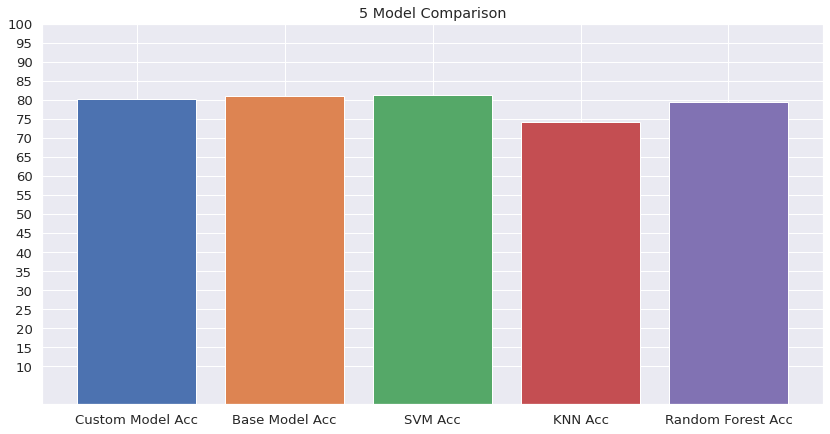

In [ ]:
plt.figure(figsize =(14,7))
plt.bar('Custom Model Acc',custom_model_accuracy)
plt.bar('Base Model Acc',base_model_accuracy)
plt.bar('SVM Acc',svm_accuracy)
plt.bar('KNN Acc',knn_accuracy)
plt.bar('Random Forest Acc',randomforest_accuracy)
plt.yticks([i for i in range(10,105,5)])
plt.title("5 Model Comparison")

plt.show()

### SVM Modelinin Sonuçlarının İncelenmesi

In [ ]:
val_predictions = ort_svm.predict(val_x)

print(val_predictions[:5], "\n")

print(val_y.head())

[5 4 3 3 5] 

210    5
58     4
943    3
584    3
218    5
Name: ort7, dtype: int64


In [ ]:
pred = val_predictions[-10:].astype("int64")
org = val_y[-10:].values
df_pred = pd.DataFrame({"preds" : pred, "labels":org})
df_pred

,preds,labels
0,5,5
1,5,5
2,4,4
3,4,4
4,4,4
5,5,4
6,5,4
7,4,4
8,5,5
9,5,5


SVM modeli %81 accuracy oranına sahipti. Gerçek değerler ile tahmin edilen 10 değeri karşılaştırdığımızda da 10 not ortalamasından 8 tanesini doğru bildiği sonucuna varıyoruz.

# Ortalamalar dahil edilmeyen dataset

In [ ]:
data_file = "Data/Veriseti_Ortaokullar_GONDERILEN.xlsx"
data_original = pd.read_excel(data_file)
df = data_original.copy()
df = df.drop(columns=["okuladi", "okulno"])
df.head()

,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ort5,ort6,ort7
0,1,0,0,0,0,0,0,5,4,1,0,3,3,0,1,1,5,2,2,2,2,0,0,0,85.5956,88.0247,91.0988
1,1,0,0,0,0,0,0,2,4,1,0,2,3,0,1,3,3,3,2,2,2,0,0,1,96.3081,94.9244,97.2963
2,1,0,0,0,0,0,0,4,2,1,0,3,3,0,1,2,1,0,4,3,2,1,0,1,93.4270,91.3742,89.7531
3,1,0,0,0,0,0,0,2,4,1,0,4,4,0,1,4,3,3,1,4,4,1,1,1,64.5563,64.8812,61.3426
4,1,0,0,0,0,0,0,2,2,1,0,4,2,1,1,4,4,2,1,4,1,0,1,0,91.8089,93.9298,93.3457


In [ ]:
df.iloc[:, -3:] = df.iloc[:, -3:].astype("int64")

In [ ]:
df.dtypes

cinsiyet           int64
Asag               int64
Bsag               int64
Aoz                int64
Boz                int64
ABayri             int64
Abirlikte          int64
Aogrenim           int64
Bogrenim           int64
Acalisma           int64
Bcalisma           int64
gelir              int64
kardes             int64
oda                int64
hastalik           int64
uyku               int64
internet           int64
televizyon         int64
eba_tv             int64
oyun               int64
ders_calisma       int64
okul_dyk           int64
ozel_kurs          int64
sosyal_kulturel    int64
ort5               int64
ort6               int64
ort7               int64
dtype: object

In [ ]:
def sifir_bir_duzelt(degisken):
  for i in df[degisken].index:
    if df[degisken][i] ==0:
      df[degisken][i] = 1
    elif df[degisken][i]==1:
      df[degisken][i]=0

In [ ]:
sifir_bir_duzelt("Asag")
sifir_bir_duzelt("Bsag")
sifir_bir_duzelt("Aoz")
sifir_bir_duzelt("Boz")
sifir_bir_duzelt("ABayri")
sifir_bir_duzelt("Abirlikte")
sifir_bir_duzelt("Acalisma")
sifir_bir_duzelt("Bcalisma")
sifir_bir_duzelt("oda")
sifir_bir_duzelt("hastalik")
sifir_bir_duzelt("okul_dyk")
sifir_bir_duzelt("ozel_kurs")

In [ ]:
df.head()

,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ort5,ort6,ort7
0,1,1,1,1,1,1,1,5,4,0,1,3,3,1,0,1,5,2,2,2,2,1,1,0,85,88,91
1,1,1,1,1,1,1,1,2,4,0,1,2,3,1,0,3,3,3,2,2,2,1,1,1,96,94,97
2,1,1,1,1,1,1,1,4,2,0,1,3,3,1,0,2,1,0,4,3,2,0,1,1,93,91,89
3,1,1,1,1,1,1,1,2,4,0,1,4,4,1,0,4,3,3,1,4,4,0,0,1,64,64,61
4,1,1,1,1,1,1,1,2,2,0,1,4,2,0,0,4,4,2,1,4,1,1,0,0,91,93,93


##Ortalama değişkenleri olmadan tahminleme

In [ ]:
df_new = df.drop(["ort6", "ort5"], axis=1)

In [ ]:
x_reduced_col_names = df_new.corr().abs()["ort7"].nlargest(10).index
df_new[x_reduced_col_names].corr()

,ort7,ders_calisma,Bogrenim,Aogrenim,ozel_kurs,gelir,televizyon,cinsiyet,oyun,kardes
ort7,1.000000,0.374718,0.333300,0.320489,0.235556,0.225700,-0.154438,-0.153145,-0.152427,-0.137633
ders_calisma,0.374718,1.000000,0.169126,0.188828,0.248800,0.123214,-0.113449,-0.159408,-0.263642,-0.053737
Bogrenim,0.333300,0.169126,1.000000,0.471159,0.199666,0.400929,-0.119668,0.016816,-0.076727,-0.098038
Aogrenim,0.320489,0.188828,0.471159,1.000000,0.215348,0.362621,-0.127693,-0.013916,-0.077455,-0.136950
ozel_kurs,0.235556,0.248800,0.199666,0.215348,1.000000,0.225053,-0.078590,-0.040946,-0.075920,-0.142769
gelir,0.225700,0.123214,0.400929,0.362621,0.225053,1.000000,-0.073796,0.040543,0.015426,-0.098684
televizyon,-0.154438,-0.113449,-0.119668,-0.127693,-0.078590,-0.073796,1.000000,0.027154,0.119261,0.076473
cinsiyet,-0.153145,-0.159408,0.016816,-0.013916,-0.040946,0.040543,0.027154,1.000000,0.340185,-0.112941
oyun,-0.152427,-0.263642,-0.076727,-0.077455,-0.075920,0.015426,0.119261,0.340185,1.000000,-0.069679
kardes,-0.137633,-0.053737,-0.098038,-0.136950,-0.142769,-0.098684,0.076473,-0.112941,-0.069679,1.000000


In [ ]:
x = df_new[x_reduced_col_names]
x.dtypes

ort7            int64
ders_calisma    int64
Bogrenim        int64
Aogrenim        int64
ozel_kurs       int64
gelir           int64
televizyon      int64
cinsiyet        int64
oyun            int64
kardes          int64
dtype: object

In [ ]:
x = x.drop("ort7", axis=1)
y = df_new.ort7

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=42)

In [ ]:
model = DecisionTreeRegressor(max_depth=4)

model.fit(train_x, train_y)

val_predictions = model.predict(val_x)

print("Eğitim doğruluğu: ", model.score(train_x, train_y)*100)
print("Test doğruluğu: ", model.score(val_x, val_y)*100)

Eğitim doğruluğu:  25.80800505589854
Test doğruluğu:  24.918389761544123


### 5. sınıf not ortalaması olan dataset ile 6. sınıf notlarının tahmini

In [ ]:
df_new = df.drop(["ort7"], axis=1)

In [ ]:
x_reduced_col_names = df_new.corr().abs()["ort6"].nlargest(10).index
df_new[x_reduced_col_names].corr()

,ort6,ort5,ders_calisma,Bogrenim,Aogrenim,gelir,ozel_kurs,kardes,televizyon,oda
ort6,1.000000,0.912723,0.364994,0.355567,0.347004,0.272485,0.241577,-0.176992,-0.175874,0.154705
ort5,0.912723,1.000000,0.327255,0.328829,0.306146,0.248373,0.211915,-0.165829,-0.158355,0.156943
ders_calisma,0.364994,0.327255,1.000000,0.169126,0.188828,0.123214,0.248800,-0.053737,-0.113449,0.050600
Bogrenim,0.355567,0.328829,0.169126,1.000000,0.471159,0.400929,0.199666,-0.098038,-0.119668,0.182016
Aogrenim,0.347004,0.306146,0.188828,0.471159,1.000000,0.362621,0.215348,-0.136950,-0.127693,0.161060
gelir,0.272485,0.248373,0.123214,0.400929,0.362621,1.000000,0.225053,-0.098684,-0.073796,0.160856
ozel_kurs,0.241577,0.211915,0.248800,0.199666,0.215348,0.225053,1.000000,-0.142769,-0.078590,0.137115
kardes,-0.176992,-0.165829,-0.053737,-0.098038,-0.136950,-0.098684,-0.142769,1.000000,0.076473,-0.222727
televizyon,-0.175874,-0.158355,-0.113449,-0.119668,-0.127693,-0.073796,-0.078590,0.076473,1.000000,-0.052602
oda,0.154705,0.156943,0.050600,0.182016,0.161060,0.160856,0.137115,-0.222727,-0.052602,1.000000


In [ ]:
x = df_new[x_reduced_col_names]
x.dtypes

ort6            int64
ort5            int64
ders_calisma    int64
Bogrenim        int64
Aogrenim        int64
gelir           int64
ozel_kurs       int64
kardes          int64
televizyon      int64
oda             int64
dtype: object

In [ ]:
x = x.drop("ort6", axis=1)
y = df_new.ort6

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=42)

In [ ]:
model = DecisionTreeRegressor(max_depth=4)

model.fit(train_x, train_y)

val_predictions = model.predict(val_x)

print("Eğitim doğruluğu: ", model.score(train_x, train_y)*100)
print("Test doğruluğu: ", model.score(val_x, val_y)*100)

Eğitim doğruluğu:  87.58984107239462
Test doğruluğu:  83.98932515916422


### 6. sınıf notları olmadan 7. sınıf notlarının tahmini

In [ ]:
df_new = df.drop(["ort6"], axis=1)

In [ ]:
x_reduced_col_names = df_new.corr().abs()["ort7"].nlargest(10).index
df_new[x_reduced_col_names].corr()

,ort7,ort5,ders_calisma,Bogrenim,Aogrenim,ozel_kurs,gelir,televizyon,cinsiyet,oyun
ort7,1.000000,0.843153,0.374718,0.333300,0.320489,0.235556,0.225700,-0.154438,-0.153145,-0.152427
ort5,0.843153,1.000000,0.327255,0.328829,0.306146,0.211915,0.248373,-0.158355,-0.144784,-0.105399
ders_calisma,0.374718,0.327255,1.000000,0.169126,0.188828,0.248800,0.123214,-0.113449,-0.159408,-0.263642
Bogrenim,0.333300,0.328829,0.169126,1.000000,0.471159,0.199666,0.400929,-0.119668,0.016816,-0.076727
Aogrenim,0.320489,0.306146,0.188828,0.471159,1.000000,0.215348,0.362621,-0.127693,-0.013916,-0.077455
ozel_kurs,0.235556,0.211915,0.248800,0.199666,0.215348,1.000000,0.225053,-0.078590,-0.040946,-0.075920
gelir,0.225700,0.248373,0.123214,0.400929,0.362621,0.225053,1.000000,-0.073796,0.040543,0.015426
televizyon,-0.154438,-0.158355,-0.113449,-0.119668,-0.127693,-0.078590,-0.073796,1.000000,0.027154,0.119261
cinsiyet,-0.153145,-0.144784,-0.159408,0.016816,-0.013916,-0.040946,0.040543,0.027154,1.000000,0.340185
oyun,-0.152427,-0.105399,-0.263642,-0.076727,-0.077455,-0.075920,0.015426,0.119261,0.340185,1.000000


In [ ]:
x = df_new[x_reduced_col_names]
x.dtypes

ort7            int64
ort5            int64
ders_calisma    int64
Bogrenim        int64
Aogrenim        int64
ozel_kurs       int64
gelir           int64
televizyon      int64
cinsiyet        int64
oyun            int64
dtype: object

In [ ]:
x = x.drop("ort7", axis=1)
y = df_new.ort7

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=42)

In [ ]:
model = DecisionTreeRegressor(max_depth=3)

model.fit(train_x, train_y)

val_predictions = model.predict(val_x)

print("Eğitim doğruluğu: ", model.score(train_x, train_y)*100)
print("Test doğruluğu: ", model.score(val_x, val_y)*100)

Eğitim doğruluğu:  75.65184324657483
Test doğruluğu:  70.36538490715249


### 5. sınıf notları olmadan 7. sınıf notlarının tahmini

In [ ]:
df_new = df.drop(["ort5"], axis=1)

In [ ]:
x_reduced_col_names = df_new.corr().abs()["ort7"].nlargest(10).index
df_new[x_reduced_col_names].corr()

,ort7,ort6,ders_calisma,Bogrenim,Aogrenim,ozel_kurs,gelir,televizyon,cinsiyet,oyun
ort7,1.000000,0.909238,0.374718,0.333300,0.320489,0.235556,0.225700,-0.154438,-0.153145,-0.152427
ort6,0.909238,1.000000,0.364994,0.355567,0.347004,0.241577,0.272485,-0.175874,-0.144251,-0.116687
ders_calisma,0.374718,0.364994,1.000000,0.169126,0.188828,0.248800,0.123214,-0.113449,-0.159408,-0.263642
Bogrenim,0.333300,0.355567,0.169126,1.000000,0.471159,0.199666,0.400929,-0.119668,0.016816,-0.076727
Aogrenim,0.320489,0.347004,0.188828,0.471159,1.000000,0.215348,0.362621,-0.127693,-0.013916,-0.077455
ozel_kurs,0.235556,0.241577,0.248800,0.199666,0.215348,1.000000,0.225053,-0.078590,-0.040946,-0.075920
gelir,0.225700,0.272485,0.123214,0.400929,0.362621,0.225053,1.000000,-0.073796,0.040543,0.015426
televizyon,-0.154438,-0.175874,-0.113449,-0.119668,-0.127693,-0.078590,-0.073796,1.000000,0.027154,0.119261
cinsiyet,-0.153145,-0.144251,-0.159408,0.016816,-0.013916,-0.040946,0.040543,0.027154,1.000000,0.340185
oyun,-0.152427,-0.116687,-0.263642,-0.076727,-0.077455,-0.075920,0.015426,0.119261,0.340185,1.000000


In [ ]:
x = df_new[x_reduced_col_names]
x.dtypes

ort7            int64
ort6            int64
ders_calisma    int64
Bogrenim        int64
Aogrenim        int64
ozel_kurs       int64
gelir           int64
televizyon      int64
cinsiyet        int64
oyun            int64
dtype: object

In [ ]:
x = x.drop("ort7", axis=1)
y = df_new.ort7

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=42)

In [ ]:
model = DecisionTreeRegressor(max_depth=4)

model.fit(train_x, train_y)

val_predictions = model.predict(val_x)

print("Eğitim doğruluğu: ", model.score(train_x, train_y)*100)
print("Test doğruluğu: ", model.score(val_x, val_y)*100)

Eğitim doğruluğu:  83.08292167435746
Test doğruluğu:  82.43266615049171


# Sadece ortalama not verileri ile tahminleme

In [ ]:
df_ort = df.iloc[:, -3:]
df_ort.head()

,ort5,ort6,ort7
0,85,88,91
1,96,94,97
2,93,91,89
3,64,64,61
4,91,93,93


In [ ]:
x = df_ort.drop("ort7", axis=1)
y = df_ort.ort7

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=42)

In [ ]:
model = DecisionTreeRegressor(max_depth=5)

model.fit(train_x, train_y)

val_predictions = model.predict(val_x)

print("Eğitim doğruluğu: ", model.score(train_x, train_y)*100)
print("Test doğruluğu: ", model.score(val_x, val_y)*100)

Eğitim doğruluğu:  84.55818827761297
Test doğruluğu:  82.01540456386324
